# Kaggle Titanic Competition

In [1]:
# https://www.kaggle.com/kenjee/titanic-project-example
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline




training = pd.read_csv("train.csv") # Has survived data
print("test rows = ", len(training))

test = pd.read_csv("test.csv")  # Hasn't survived data
print("training rows = ", len(test))

test_columns = list(test.columns) # Show table header
print(test_columns)


#train_x = # x is what we pass in 
#train_y = # y is what we are trying to predict 



test rows =  891
training rows =  418
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [2]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='Count'>

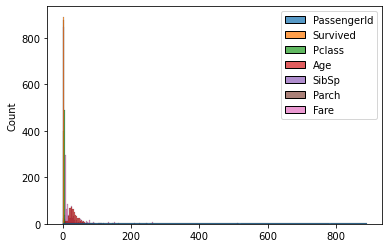

In [4]:
sns.histplot(data=training)